In [1]:
import importlib
import numpy as np
import sys
sys.path.append('../')

import Parallel_Run
importlib.reload(Parallel_Run)

import matplotlib.pyplot as plt

media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/"

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)
import cProfile
import re


In [4]:
import numpy as np
from Cluster import Cluster
from ISF import ISF
from MSD import MSD
from Energy import NRG
from PCF import PCF
from PCF import PCF_L
from Time import Time
# gillespie parameter
Nlinker = 2
ell_tot = 10**3
kdiff = 1./ell_tot
Energy = -15

Nprocess = 50
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]

# argument of the different classes
cluster_arg = tuple([3.]) # max distance
MSD_arg = () # no argument 
ISF_arg = (0.5,10) # q_norm, q_num_sample
NRG_arg = ()
PCF_arg = (np.sqrt(ell_tot)/2,50) # max_distance,numb_bin
PCF_L_arg = (ell_tot,30) # max_distance,numb_bin
Time_arg = ()

measurement_args = {
    'cluster': (Cluster, cluster_arg),
    'MSD': (MSD, MSD_arg),
    'ISF': (ISF, ISF_arg),
    'PCF':(PCF,PCF_arg),
    'PCF_L':(PCF_L,PCF_L_arg),
    'NRG':(NRG,NRG_arg),
    'Time':(Time,Time_arg)
    # Add other measurements as needed
}

measurement_flags = {
    'NRG':True,
    'Cluster': False,
    'MSD': False,
    'ISF': False,
    'PCF':True,
    'PCF_L':False,
    'Time':True
    # Set each measurement to True/False as desired
}

# Simulation parameters
step_tot = 10**4
#check_steps = 10**2
initial_check_steps = step_tot
coarse_grained_step = 10**3
log_base=1.5

In [4]:
L = 10**3
Nint = 10**3
Rmax = 10**3
S = lambda r,l : 3/2*np.log(3/(2*np.pi*l))-3/2*r**2/l+L*np.log(4*np.pi)
p = lambda r,l : (3/(2*np.pi*l))**(3/2)*np.exp(-3*r**2/(2*l))*1/L
int_L = lambda r : np.sum(np.array([(L)/Nint * p(r,i*(L)/Nint) * S(r,i*(L)/Nint) for i in range(1,Nint+1)]))
#int_L = lambda r : np.sum(np.array([(L)/Nint * p(r,i*(L)/Nint)  for i in range(1,Nint+1)]))
int_r = np.sum(np.array([int_L(i*(Rmax)/Nint)*4*np.pi*(i*(Rmax)/Nint)**2 * (Rmax)/Nint for i in range(1,Nint+1)]))
print(int_r+15)

2534.461364460314


In [9]:
L = 10**3
Nint = 10**4
Rmax = 10**3

r_values = np.linspace(Rmax/Nint, Rmax, Nint)
l_values = np.linspace(L/Nint, L, Nint)

S_vectorized = lambda r, l: 3/2*np.log(3/(2*np.pi*l))-3/2*r**2/l+L*np.log(4*np.pi)
p_vectorized = lambda r, l: (3/(2*np.pi*l))**(3/2)*np.exp(-3*r**2/(2*l))*1/L

# Outer integral over r
int_r = 0
for r in r_values:
    # Inner integral over l
    int_L = np.sum(p_vectorized(r, l_values) * S_vectorized(r, l_values) * (L/Nint))
    int_r += int_L * 4 * np.pi * r**2 * (Rmax/Nint)

print(int_r + 15)


2534.5528882666476


In [5]:
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'Single_node_behavior.hdf',measurement_args,measurement_flags,log_base)

In [5]:
kdiff=0.01
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'Single_node_behavior_kdiff001.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [6]:
kdiff=0.1
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'Single_node_behavior_kdiff01.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [7]:
kdiff=10
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'Single_node_behavior_kdiff10.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [8]:
kdiff=100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
Parallel_Run.parallel_evolution(args,step_tot,initial_check_steps,coarse_grained_step,media+'Single_node_behavior_kdiff100.hdf',
                                cluster_arg,MSD_arg,ISF_arg,NRG_arg,PCF_arg,PCF_L_arg,log_base)

In [7]:
from Data_Treatement import *

In [16]:
#NRG_001 = Data_Treatement(media+'Single_node_behavior_kdiff001.hdf',data_type='NRG')
NRG_01 = Data_Treatement(media+'Single_node_behavior_kdiff01.hdf',data_type='NRG')
NRG = Data_Treatement(media+'Single_node_behavior.hdf',data_type='NRG')
#NRG_10 = Data_Treatement(media+'Single_node_behavior_kdiff10.hdf',data_type='NRG')
#NRG_100 = Data_Treatement(media+'Single_node_behavior_kdiff100.hdf',data_type='NRG')
#NRG_1000 = Data_Treatement(media+'Single_node_behavior_kdiff1000.hdf',data_type='NRG')

In [17]:
#NRG.rescale_energy()
#NRG_001.rescale_energy()
#NRG_01.rescale_energy()
#NRG_10.rescale_energy()
#NRG_100.rescale_energy()
#NRG_1000.rescale_energy()

NRG.average(num_bins=10)
#NRG_001.average(num_bins=10)
NRG_01.average(num_bins=10)
#NRG_10.average(num_bins=10)
#NRG_100.average(num_bins=10)
#NRG_1000.average(num_bins=10)

In [12]:
print(Fmin(3,1000,-15))
print(Fmax(3,1000,-15))
print(2507+3*15)
print(np.mean(NRG_001.average_data))
print(np.mean(NRG_10.average_data))
print(np.mean(NRG_01.average_data))

-2568.431174228383
-2553.6626283408004
2552
-2535.8168286207956
-2534.9487988892356
-2535.902104350961


-2570.962198475352


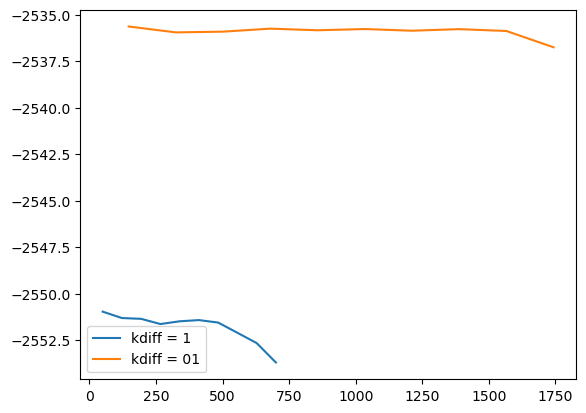

In [19]:
Ffree = -3*15-998*np.log(4*np.pi)
print(Ffree)
#plt.plot(NRG_1000.binned_time*1000,NRG_1000.average_data,label='kdiff = 1000')
#plt.plot(NRG_100.binned_time*100,NRG_100.average_data-Ffree,label='kdiff = 100')
#plt.plot(NRG_10.binned_time,NRG_10.average_data-Ffree,label='kdiff = 10')
plt.plot(NRG.binned_time,NRG.average_data,label='kdiff = 1')
plt.plot(NRG_01.binned_time,NRG_01.average_data,label='kdiff = 01')
#plt.plot(NRG_001.binned_time,NRG_001.average_data-Ffree,label='kdiff = 001')
plt.legend()

# PCF

In [21]:
#PCF_001 = Data_Treatement(media+'Single_node_behavior_kdiff001.hdf',data_type='PCF')
#PCF_01 = Data_Treatement(media+'Single_node_behavior_kdiff01.hdf',data_type='PCF')
PCF = Data_Treatement(media+'Single_node_behavior.hdf',data_type='PCF')
#PCF_10 = Data_Treatement(media+'Single_node_behavior_kdiff10.hdf',data_type='PCF')
#PCF_100 = Data_Treatement(media+'Single_node_behavior_kdiff100.hdf',data_type='PCF')

In [22]:
PCFs = [PCF]#[PCF_001,PCF_01,PCF,PCF_10,PCF_100]

In [23]:
PCF.average(num_bins=30)
#PCF_001.average(num_bins=30)
#PCF_01.average(num_bins=30)
#PCF_10.average(num_bins=30)
#PCF_100.average(num_bins=30)

In [29]:
from scipy.special import erfc
Pmeet = lambda r,L=10**3,a=1 : 3*a**2*erfc(np.sqrt(3/2)*r/(np.sqrt(a*L)))/(2*L*np.pi*r)
ell_tot = 10**3
Nlinker = 2
Vpolymer = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
rho = Nlinker/Vpolymer
print(rho)
Pmeets = np.mean(np.array([Pmeet(PCF.binned_time[0],l) for l in range(1,1000)]),axis=0)
Pmeets = Pmeet(PCF.binned_time[0],1000/5)
print(Pmeets.shape)

0.0002789528079036227
(50,)


(1e-05, 0.01)

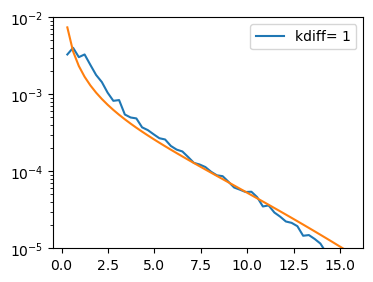

In [30]:
plt.figure(figsize=(4,3))
#plt.plot(PCF_001.binned_time[0],PCF_001.average_data[0],label = 'kdiff= 001')
#plt.plot(PCF_01.binned_time[0],PCF_01.average_data[0],label = 'kdiff= 01')
plt.plot(PCF.binned_time[0],PCF.average_data[0],label = 'kdiff= 1')
#plt.plot(PCF_10.binned_time[0],PCF_10.average_data[0],label = 'kdiff= 10')
#plt.plot(PCF_100.binned_time[0],PCF_100.average_data[0],label = 'kdiff= 100')
plt.plot(PCF.binned_time[0],Pmeets)#Pmeet(PCF_001.binned_time[0],L=200))
plt.legend()
plt.yscale('log')
plt.ylim(10**-5,10**-2)

In [24]:
max_distance,num_bins = PCF_arg
def histogram_float(*args, **kwargs):
    counts, bin_edges = np.histogram(*args, **kwargs)
    return counts.astype(float), bin_edges
counts,bin_edges = histogram_float([],bins=num_bins,range=(0,max_distance))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_widths = bin_edges[1:] - bin_edges[:-1]
#shell_volumes = (4 / 3) * np.pi * ((bin_centers + bin_widths)**3 - bin_centers**3)
shell_volumes = 4/3 * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)
for pcf in PCFs:
    print(np.sum(pcf.average_data[0]*shell_volumes))

0.9724147517476165


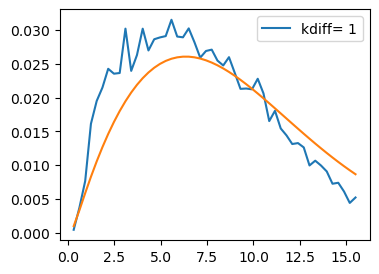

In [31]:
plt.figure(figsize=(4,3))
#plt.plot(PCF_001.binned_time[0],shell_volumes*PCF_001.average_data[0],label = 'kdiff= 001')
#plt.plot(PCF_01.binned_time[0],shell_volumes*PCF_01.average_data[0],label = 'kdiff= 01')
plt.plot(PCF.binned_time[0],shell_volumes*PCF.average_data[0],label = 'kdiff= 1')
#plt.plot(PCF_10.binned_time[0], shell_volumes*PCF_10.average_data[0],label = 'kdiff= 10')
#plt.plot(PCF_100.binned_time[0],shell_volumes*PCF_100.average_data[0],label = 'kdiff= 100')
plt.plot(PCF.binned_time[0],shell_volumes*Pmeets)#Pmeet(PCF_001.binned_time[0],L=200))
plt.legend()
#plt.yscale('log')
#plt.ylim(10**-5,10**-2)

In [26]:
#print(np.sum(shell_volumes*PCF_001.average_data[0]*bin_centers))
#print(np.sum(shell_volumes*PCF_01.average_data[0]*bin_centers))
print(np.sum(shell_volumes*PCF.average_data[0]*bin_centers))
#print(np.sum(shell_volumes*PCF_10.average_data[0]*bin_centers))
#print(np.sum(shell_volumes*PCF_100.average_data[0]*bin_centers))

6.8177025339159725


# Clusters

In [157]:
clust_001 = Data_Treatement(media+'Single_node_behavior_kdiff001.hdf',data_type='cluster')
clust_01 = Data_Treatement(media+'Single_node_behavior_kdiff01.hdf',data_type='cluster')
clust_1 = Data_Treatement(media+'Single_node_behavior.hdf',data_type='cluster')
clust_10 = Data_Treatement(media+'Single_node_behavior_kdiff10.hdf',data_type='cluster')
clust_100 = Data_Treatement(media+'Single_node_behavior_kdiff100.hdf',data_type='cluster')
clust_1.average(num_bins=10)
clust_001.average(num_bins=10)
clust_01.average(num_bins=10)
clust_10.average(num_bins=10)
clust_100.average(num_bins=10)
clusts = [clust_001,clust_01,clust_1,clust_10,clust_100]

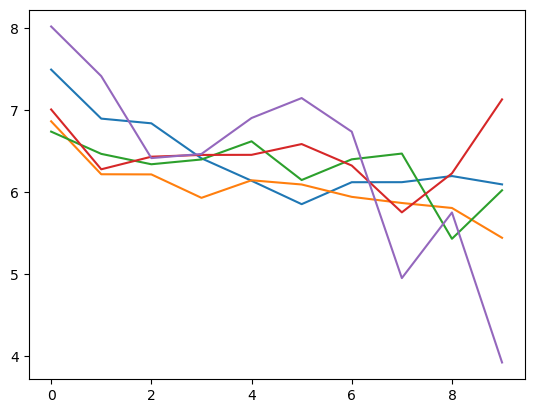

In [161]:
for clust in clusts:
    plt.plot(np.arange(0,clust.binned_time.shape[0],1),clust.average_data[:,2])

# Conclusions:
First, in order to obtain a good measurement of the free energy, we need that coarse grained step is much larger than the ratio kdiff/kmeet. it is hard to compute kmeet (on mathematica we got $<kmeet> \approx 0.001$). Practically, $coarse grained step = 10^3$ leads to a kdiff limit around 10.
## Free energy
The free energy is fairly close to the theoretical one : $F_{sim} \approx -2550$, this has to be compared with the best scenario : $F_free = -2558$, but the worst one $F_{worse} = -2543$. which means that the simulation is literally in between. 
## Average distance
The average distance from the analytic formula is r_av = 0.997, a little closer to small distances than the average of the simulation. Notice that this value is dominated by what happens close to 0.
## PCF


In [101]:
(-2550 + 2558)/(-2543+2558)

0.5333333333333333